In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
import pandas as pd


In [14]:
# Importing dataset

data = pd.read_csv('adult.csv')

dataset = data.drop("', '', '', '', 'hours_per_week', '', ''", axis=1)

In [15]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   worktype            32561 non-null  object
 2   fnlwt               32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_number    32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relatioship_status  32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  income              32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

In [17]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [19]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [20]:
feature_imp = selector.feature_importances_

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 32561 non-null  int64
 1   worktype            32561 non-null  int64
 2   fnlwt               32561 non-null  int64
 3   education           32561 non-null  int64
 4   education_number    32561 non-null  int64
 5   marital_status      32561 non-null  int64
 6   occupation          32561 non-null  int64
 7   relatioship_status  32561 non-null  int64
 8   race                32561 non-null  int64
 9   sex                 32561 non-null  int64
 10  capital_gain        32561 non-null  int64
 11  capital_loss        32561 non-null  int64
 12  hours_per_week      32561 non-null  int64
 13  native_country      32561 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [25]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (26048, 14)
X_test shape: (6513, 14)
Y_train shape: (26048,)
Y_test shape: (6513,)


In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [27]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [28]:
Y_pred_log_reg = log_reg.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 82.47
F1 score: 55.84


In [30]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
svm_model = SVC()


rf_model = RandomForestClassifier()


lr_model = LogisticRegression()


In [31]:
svm_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)
lr_model.fit(X_train, Y_train)

svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

In [32]:
models = {'SVM': svm_model, 'Random Forest': rf_model, 'Logistic Regression': lr_model}

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, y_pred))
    print("\n")

Model: SVM
Accuracy: 0.8519883310302472
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4942
           1       0.77      0.56      0.64      1571

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.78      6513
weighted avg       0.85      0.85      0.84      6513

Confusion Matrix:
[[4675  267]
 [ 697  874]]


Model: Random Forest
Accuracy: 0.8630431444802702
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.76      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513

Confusion Matrix:
[[4619  323]
 [ 569 1002]]


Model: Logistic Regression
Accuracy: 0.8246583755565792
Classification Report:
              precision    recall  f1

In [39]:
import matplotlib.pyplot as plt

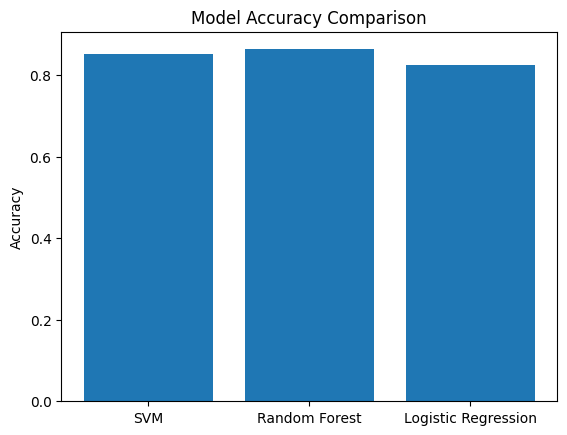

In [40]:
# Step 7: Plot Accuracy Comparison
accuracies = {name: accuracy_score(Y_test, model.predict(X_test)) for name, model in models.items()}
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

In [43]:
import seaborn as sns

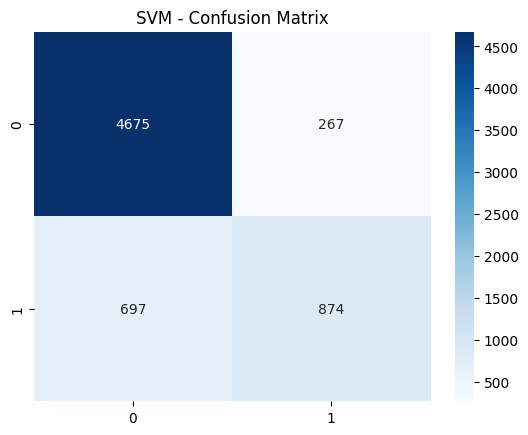

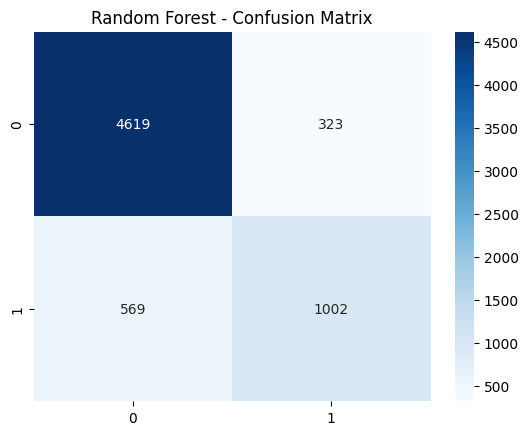

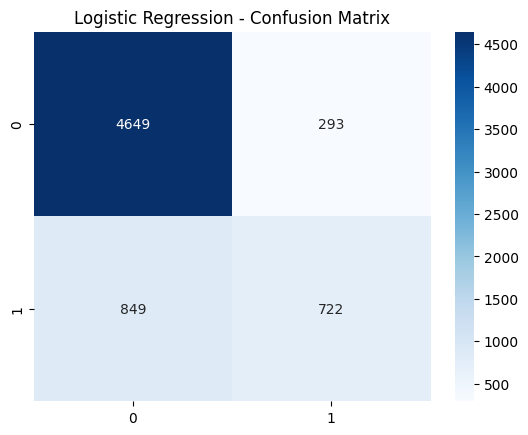

In [44]:
# Step 8: Plot Confusion Matrix as Heatmap
for name, model in models.items():
    plt.figure()
    sns.heatmap(confusion_matrix(Y_test, model.predict(X_test)), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


In [45]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [46]:
# Step 9: Randomized Grid Search for Hyperparameter Tuning (Example for Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [47]:
# Best Parameters after tuning
print(f"Best Hyperparameters for Random Forest: {random_search.best_params_}")

Best Hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}


In [57]:
# Step 10: Predict for a single input
single_input = X_test.iloc[100].values.reshape(1, -1)  # Modify index based on the desired test input
predicted_income = random_search.predict(single_input)
if predicted_income[0] == 0:
    print("Predicted Income for the input is: <=50K")
else:
    print("Predicted Income for the input is: >50K")
# print(f"Predicted Income for the input is: {predicted_income[0]}")

Predicted Income for the input is: >50K


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
